# SPICY Catalog - cross-match with ALMA-IMF

https://ui.adsabs.harvard.edu/abs/2020arXiv201112961K/abstract

In [1]:
%matplotlib inline
import pylab as pl
pl.style.use('dark_background')
pl.rcParams['font.size'] = 16

## Part 1: Find which SPICY sources are in ALMA-IMF

In [2]:
from astropy.io import fits
from astropy.table import Table

In [3]:
tbl = Table.read('https://sites.astro.caltech.edu/~mkuhn/SPICY/table1.fits')

In [4]:
tbl

<Table length=117446>
SPICY      ra        dec     ...       AllWISE             ZTFDR3    
          deg        deg     ...                                     
int64   float64    float64   ...       bytes20             int64     
------ ---------- ---------- ... -------------------- ---------------
     1 125.664811 -37.551349 ... J082239.55-373304.5               --
     2 125.795513    -37.585 ... J082310.90-373505.9               --
     3 125.860244 -37.577463 ... J082326.45-373438.8               --
     4 125.946863 -37.770809 ... J082347.25-374615.0               --
     5 126.003155 -37.126075 ... J082400.75-370733.7               --
     6   126.1733 -38.104664 ... J082441.57-380616.8               --
     7 126.301474  -37.89513 ... J082512.35-375342.2               --
     8 126.307182 -38.226459 ... J082513.74-381335.5               --
     9 126.309578 -38.229803 ... J082514.29-381347.2               --
   ...        ...        ... ...                  ...             ...
117437 346.339091  60.324508 ...                                   --
117438 346.341442  60.328036 ... J230521.93+601940.8  831205400026383
117439 346.384885  60.357382 ...                                   --
117440 346.387037  60.335355 ... J230532.88+602007.3               --
117441 346.404337  60.340633 ... J230537.04+602026.1  831205400025843
117442 346.409252  60.325435 ... J230538.33+601931.7  831205400041086
117443 346.420692  60.338188 ...                      831205400057474
117444  346.42526  60.348403 ... J230542.06+602054.1  831205400025506
117445 346.436095  60.349118 ... J230544.66+602056.7  831205400025463
117446 346.448467  60.342226 ... J230547.64+602031.9  831205400040819

In [5]:
from astropy.coordinates import SkyCoord
from astropy import units as u
coords = SkyCoord(tbl['l'], tbl['b'], frame='galactic', unit=(u.deg, u.deg))
coords

<SkyCoord (Galactic): (l, b) in deg
    [(255.975183, -0.253369), (256.06207 , -0.187675),
     (256.085297, -0.141319), ..., (110.208963,  0.115081),
     (110.214168,  0.113614), (110.21706 ,  0.104861)]>

In [6]:
import sys
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from spectralindex import prefixes

In [7]:
from spectral_cube import SpectralCube

In [8]:
import os
os.chdir('/orange/adamginsburg/ALMA_IMF/May2021Release/')

prefixes['W43MM1'] = dict(
    finaliter_prefix_b3="W43-MM1/B3/cleanest/W43-MM1_B3_uid___A001_X1296_X1af_continuum_merged_12M_robust0_selfcal4_finaliter",
    finaliter_prefix_b6="W43-MM2/B6/cleanest/W43-MM2_B6_uid___A001_X1296_X113_continuum_merged_12M_robust0_selfcal5_finaliter",)

for fieldid, pfxs in prefixes.items():
    cube = SpectralCube.read(pfxs['finaliter_prefix_b3']+".image.tt0.fits", format='fits', use_dask=False).minimal_subcube()
    ww = cube.wcs.celestial
    ww._naxis = cube.shape[1:]
    matches = ww.footprint_contains(coords)
    print(f"{fieldid}: {matches.sum()}")

G328: 17
G333: 2
G12: 11
W51IRS2: 4
G008: 13
G327: 6
G10: 8
G337: 10
G338: 5
G351: 21
G353: 11
W43MM3: 6
W43MM2: 6
W43MM1: 2
W51-E: 2


In [9]:
for fieldid, pfxs in prefixes.items():
    cube = SpectralCube.read(pfxs['finaliter_prefix_b3']+".image.tt0.fits", format='fits', use_dask=False).minimal_subcube()
    ww = cube.wcs.celestial
    ww._naxis = cube.shape[1:]
    matches = ww.footprint_contains(coords)
    print(f"{fieldid}: {matches.sum()}")
    print(tbl[matches][['SPICY','p1','class','UKIDSS','VIRAC']])
    print()

G328: 17
SPICY  p1    class          UKIDSS         VIRAC  
----- ---- --------- ------------------- ---------
31362   -- uncertain                     336878763
31366 0.71 FS                            336878800
31367 0.76 FS                            336993608
31389 0.66 ClassII                       336879047
31390   -- uncertain                     336879062
31395 0.91 FS                                   --
31405   -- uncertain                     336879094
31415  0.9 ClassI                        337085859
31420 0.84 ClassII                              --
31423 0.56 ClassI                        337085862
31431 0.87 ClassI                        337085901
31432  0.8 uncertain                            --
31438 0.82 FS                                   --
31441   -- uncertain                     337036104
31444   -- uncertain                     337036046
31453 0.55 ClassI                        337286988
31463 0.55 uncertain                            --

G333: 2
SPICY  p1    

# Show the sources on the ALMA-IMF cutouts

In [10]:
import sys
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis')

In [11]:
import spitzer_plots
from spitzer_plots import show_fov_on_spitzer, contour_levels
from spectralindex import prefixes
from spectral_cube import SpectralCube

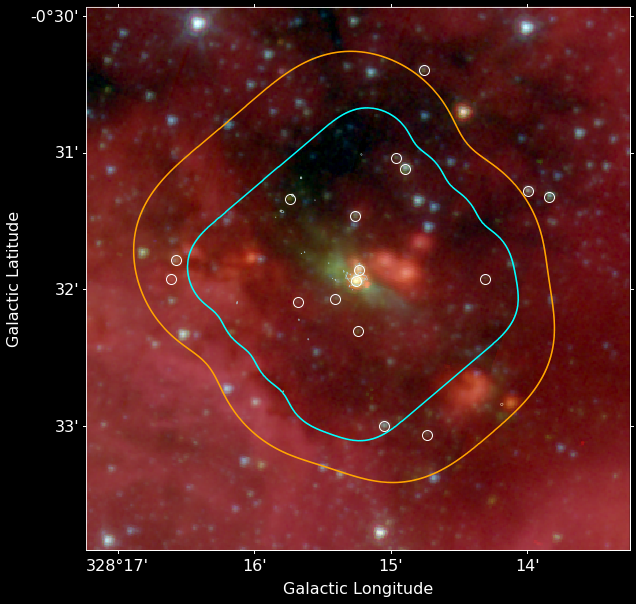

In [12]:
fieldid = 'G328'
basepath = '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults'
pfxs = prefixes[fieldid]
fig = show_fov_on_spitzer(**{key: f'{basepath}/{val}' for key,val in pfxs.items()},
                          fieldid=fieldid, spitzerpath=f'{basepath}/spitzer_datapath',
                          contour_level=contour_levels[fieldid])


cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b3']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]
matches = ww.footprint_contains(coords)

cc = coords[matches]

ax = fig.gca()
ax.plot(cc.fk5.ra.deg, cc.fk5.dec.deg, 'wo', mfc='none', mec='w', markersize=10, transform=ax.get_transform('fk5'), )

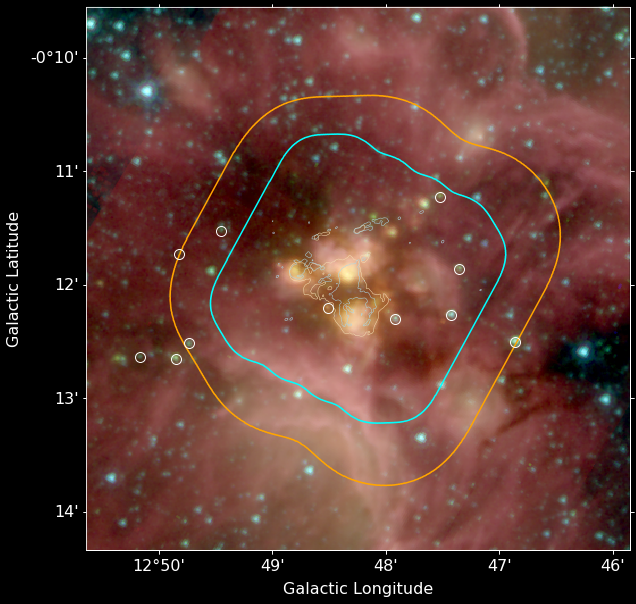

In [13]:
fieldid = 'G12'
basepath = '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults'
pfxs = prefixes[fieldid]
fig = show_fov_on_spitzer(**{key: f'{basepath}/{val}' for key,val in pfxs.items()},
                          fieldid=fieldid, spitzerpath=f'{basepath}/spitzer_datapath',
                          contour_level=contour_levels[fieldid])


cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b3']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]
matches = ww.footprint_contains(coords)

cc = coords[matches]

ax = fig.gca()
ax.plot(cc.fk5.ra.deg, cc.fk5.dec.deg, 'wo', mfc='none', mec='w', markersize=10, transform=ax.get_transform('fk5'), )

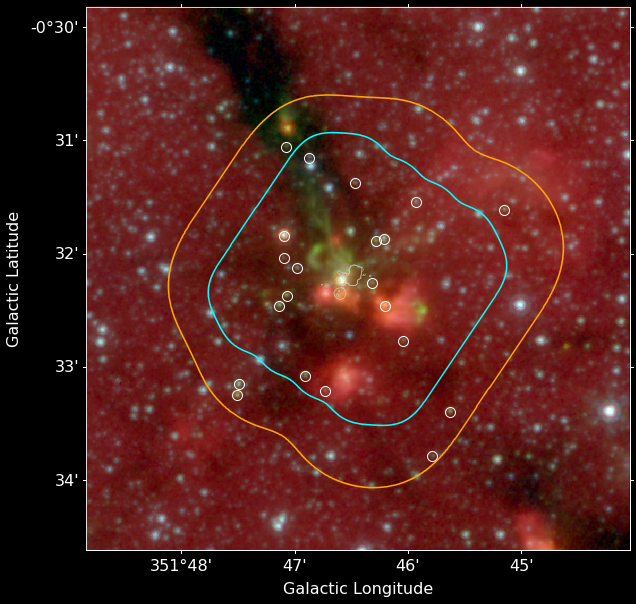

In [14]:
fieldid = 'G351'
basepath = '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults'
pfxs = prefixes[fieldid]
fig = show_fov_on_spitzer(**{key: f'{basepath}/{val}' for key,val in pfxs.items()},
                          fieldid=fieldid, spitzerpath=f'{basepath}/spitzer_datapath',
                          contour_level=contour_levels[fieldid])


cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b3']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]
matches = ww.footprint_contains(coords)

cc = coords[matches]

ax = fig.gca()
ax.plot(cc.fk5.ra.deg, cc.fk5.dec.deg, 'wo', mfc='none', mec='w', markersize=10, transform=ax.get_transform('fk5'), )

In [15]:
tbl[matches].show_in_notebook()

In [16]:
from astroquery.vizier import Vizier
from astroquery.svo_fps import SvoFps

In [17]:
from astropy import table

# Obtain VVV "VIRAC" YZJHK magnitudes to go along with the Spitzer magnitudes

This grabs the rows of the VIRAC table matched in SPICY and merges them.

In [18]:
thistbl = tbl[matches]
virac_numbers = thistbl['VIRAC']
virac_match = Vizier(row_limit=1000).query_constraints(srcid=",".join(map(str, virac_numbers[~virac_numbers.mask])),
                                                       catalog='II/364/virac')[0]
virac_match.rename_column('srcid','VIRAC')
sed_tbl = table.join(thistbl[~virac_numbers.mask], virac_match, join_type='left')
sed_tbl.show_in_notebook()

In [19]:
# hacky function to extract the rows of an SED table as a plottable entry
def getrow(tb, rownum, keys=['Ymag', 'Zmag', 'Jmag', 'Hmag', 'Ksmag','mag3_6', 'mag4_5', 'mag5_8', 'mag8_0',]):
    return np.array([tb[rownum][key] for key in keys])

In [20]:
magcols = ['Ymag', 'Zmag', 'Jmag', 'Hmag', 'Ksmag','mag3_6', 'mag4_5', 'mag5_8', 'mag8_0',]
emagcols = ['Yell', 'Zell', 'Jell', 'Hell', 'KsEll','e_mag3_6', 'e_mag4_5', 'e_mag5_8', 'e_mag8_0',]

# these are the official filternames on SVO_FPS
filternames = ['Paranal/VISTA.Y', 'Paranal/VISTA.Z', 'Paranal/VISTA.J', 'Paranal/VISTA.H', 'Paranal/VISTA.Ks',
               'Spitzer/IRAC.I1', 'Spitzer/IRAC.I2', 'Spitzer/IRAC.I3', 'Spitzer/IRAC.I4']
filter_meta = table.vstack([SvoFps.get_filter_list(facility='Paranal', instrument='VIRCAM'),
                            SvoFps.get_filter_list(facility='Spitzer', instrument='IRAC')])
zpts = {filtername: filter_meta[filter_meta['filterID']==filtername]['ZeroPoint'] for filtername in filternames}
wavelengths = [np.average(SvoFps.get_transmission_data(filtername)['Wavelength'],
                          weights=SvoFps.get_transmission_data(filtername)['Transmission'])
              for filtername in filternames]

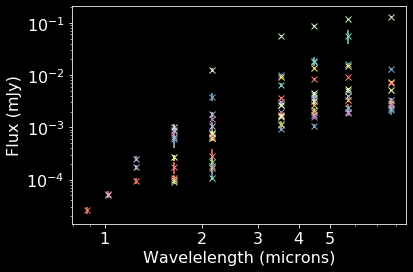

In [21]:
sed = sed_tbl[magcols]
esed = sed_tbl[emagcols]
zps = np.array([zpts[fn] for fn in filternames], dtype='float').squeeze()*u.Jy

for rownum in range(len(sed)):
    flx = zps.value * 10**(getrow(sed, rownum)/-2.5)
    err = getrow(esed, rownum, emagcols) / 1.09 * flx
    pl.errorbar(np.array(wavelengths)/1e4, flx, yerr=err, marker='x', linestyle='none')
_=pl.loglog()
_=pl.gca().set_xticks([1,2,3,4,5])
_=pl.gca().set_xticklabels([1,2,3,4,5])
_=pl.xlabel("Wavelelength (microns)")
_=pl.ylabel("Flux (mJy)")

# Follow docs to fit SEDs

https://sedfitter.readthedocs.io/en/stable/fitting.html

In [22]:
robitaille_modeldir = '/blue/adamginsburg/richardson.t/research/flux/robitaille_models/'

In [23]:
from sedfitter import fit, Fitter

In [24]:
# https://sedfitter.readthedocs.io/en/stable/convolution.html
from sedfitter.filter import Filter
from astroquery.svo_fps import SvoFps

# these are the official filternames on SVO_FPS
filternames = ['Paranal/VISTA.Y', 'Paranal/VISTA.Z', 'Paranal/VISTA.J', 'Paranal/VISTA.H', 'Paranal/VISTA.Ks',
               'Spitzer/IRAC.I1', 'Spitzer/IRAC.I2', 'Spitzer/IRAC.I3', 'Spitzer/IRAC.I4']
filtercurves = {filtername: SvoFps.get_transmission_data(filtername) for filtername in filternames}
wavelengths = [np.average(filtercurves[filtername]['Wavelength'],
                          weights=filtercurves[filtername]['Transmission'])
              for filtername in filternames]
wavelength_dict = {filtername: np.average(filtercurves[filtername]['Wavelength'],
                                          weights=filtercurves[filtername]['Transmission'])*u.AA
                   for filtername in filternames}

filterfreqs = {filtername: u.Quantity(filtercurves[filtername]['Wavelength'], u.AA).to(u.Hz, u.spectral()) for filtername in filternames}
filtertrans = {filtername: np.array(filtercurves[filtername]['Transmission'])[np.argsort(filterfreqs[filtername])]
              for filtername in filternames}
filterfreqs = {filtername: np.sort(filterfreqs[filtername]) for filtername in filternames}

sed_filters = [Filter(name=filtername,
                      central_wavelength=wl*u.AA,
                      nu=filterfreqs[filtername],
                      response=filtertrans[filtername])
               for filtername, wl in zip(filternames, wavelengths)]

almaimf_bandends_1mm = [[216.10085679, 216.36181569],
                        [217.05104378, 217.31175857],
                        [219.90488464, 220.04866835],
                        [218.13102322, 218.39222624],
                        [219.51976276, 219.66379059],
                        [230.31532951, 230.81137113],
                        [231.06503709, 231.56181105],
                        [231.52507012, 233.42623749]]*u.GHz
nu_1mm = np.linspace(almaimf_bandends_1mm.min(), almaimf_bandends_1mm.max(), 5000)
response_1mm = np.zeros(nu_1mm.size, dtype='bool')
for start, stop in almaimf_bandends_1mm:
    response_1mm |= (nu_1mm > start) & (nu_1mm < stop)
sed_filters.append(Filter(name='ALMA-IMF_1mm',
                          central_wavelength=(228.15802*u.GHz).to(u.mm, u.spectral()),
                          nu=nu_1mm,
                          response=response_1mm.astype(float),
                         ))

for filterfunc in sed_filters:
    filterfunc.normalize()


almaimf_bandends_3mm = [[ 93.13410936,  93.25141259],
                        [ 91.75059068,  92.68755174],
                        [102.15273354, 103.0896946 ],
                        [104.55323851, 105.49019957]]*u.GHz
nu_3mm = np.linspace(almaimf_bandends_3mm.min(), almaimf_bandends_3mm.max(), 5000)
response_3mm = np.zeros(nu_3mm.size, dtype='bool')
for start, stop in almaimf_bandends_3mm:
    response_3mm |= (nu_3mm > start) & (nu_3mm < stop)
sed_filters.append(Filter(name='ALMA-IMF_3mm',
                          central_wavelength=(99.68314596*u.GHz).to(u.mm, u.spectral()),
                          nu=nu_3mm,
                          response=response_3mm.astype(float),
                         ))

wavelength_dict['ALMA-IMF_1mm'] = (228.15802*u.GHz).to(u.um, u.spectral())
wavelength_dict['ALMA-IMF_3mm'] = (99.68314596*u.GHz).to(u.um, u.spectral())

In [25]:
if not os.path.exists(f'{robitaille_modeldir}/s-pbhmi/convolved/Spitzer/IRAC.I1.fits'):
    from sedfitter.convolve import convolve_model_dir

    for model_dir in glob.glob(f'{robitaille_modeldir}/s*'):
        convolve_model_dir(model_dir, sed_filters)

In [26]:
-2.5 / np.log(10)

-1.0857362047581294

In [27]:
from astropy import units as u
from sedfitter.extinction import Extinction
from sedfitter.source import Source

# Define path to models
model_dir = f'{robitaille_modeldir}/s-ubhmi'


# make an extinction law
from dust_extinction.parameter_averages import F19
ext = F19(3.1)


# https://arxiv.org/abs/0903.2057
# 1.34 is from memory
guyver2009_avtocol = (2.21e21 * u.cm**-2 * (1.34*u.Da)).to(u.g/u.cm**2)
ext_wav = np.sort((np.geomspace(0.301, 8.699, 1000)/u.um).to(u.um, u.spectral()))
ext_vals = ext.evaluate(ext_wav, Rv=3.1)
extinction = Extinction()
extinction.wav = ext_wav
extinction.chi = ext_vals / guyver2009_avtocol

# Define filters and apertures
#filters = ['2J', '2H', '2K', 'I1', 'I2', 'I3', 'I4']
#apertures = [3., 3., 3., 3., 3., 3., 3.] * u.arcsec
filters = filternames
apertures = ([3]*len(filternames))*u.arcsec


source = Source()
# wavelengths, getrow(sed, rownum), yerr=getrow(esed, rownum, emagcols),
rownum = 3
data = getrow(sed, rownum)
error = getrow(esed, rownum, emagcols)
valid = np.isfinite(data)
flx = (zps * 10**(data/-2.5)).to(u.mJy).value

#flx = flx[valid]
#error = error[valid]

source.valid = valid#[valid]
source.flux = flx    
source.error =  error / 1.09 * flx

fitter = Fitter(filter_names=np.array(filters),#[valid],
                apertures=apertures,#[valid],
                model_dir=model_dir,
                extinction_law=extinction,
                distance_range=[1.8,2.2]*u.kpc,
                av_range=[0,40],
               )


# Run the fitting
fitinfo = fitter.fit(source)

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-ubhmi
   Log[d] stepping     :  0.02
   Number of distances :  6

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------



   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-ubhmi/convolved/Paranal/VISTA.Y.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-ubhmi/convolved/Paranal/VISTA.Z.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-ubhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-ubhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-ubhmi/convolved/Paranal/VISTA.Ks.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-ubhmi/convolved/Spitzer/IRAC.I1.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-ubhmi/convolved/Spitzer/IRAC.I2.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-ubhmi/convolved/Spitzer/IRAC.I3.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-u

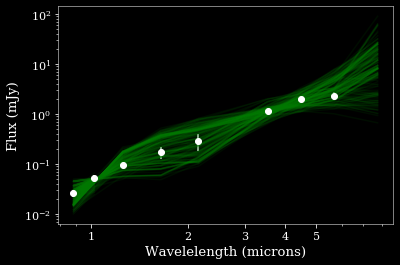

In [28]:
pl.errorbar(np.array(wavelengths)/1e4, source.flux, yerr=source.error, linestyle='none', color='w', marker='o')
_=pl.plot(np.array(wavelengths)/1e4, 10**fitinfo.model_fluxes[fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 75,:].T, alpha=0.1, color='g')
_=pl.loglog()
_=pl.gca().set_xticks([1,2,3,4,5])
_=pl.gca().set_xticklabels([1,2,3,4,5])
_=pl.xlabel("Wavelelength (microns)")
_=pl.ylabel("Flux (mJy)")

In [29]:
fitinfo.model_id, fitinfo.model_fluxes, fitinfo.sc, fitinfo.chi2, fitinfo.filter_table, fitinfo.source, fitinfo.chi2.min()

(array([ 3257,  3256,  3255, ..., 37728, 37715, 89999]),
 <Quantity [[-1.30112004, -1.60935039, -0.97429419, ...,  0.24437034,
              0.41519488,  0.92315078],
            [-1.30275966, -1.63007401, -0.94990838, ...,  0.24211789,
              0.40160656,  0.91871544],
            [-1.30604616, -1.63577103, -0.94107252, ...,  0.25213662,
              0.40791523,  0.92702805],
            ...,
            [        nan,         nan,         nan, ...,         nan,
                     nan,         nan],
            [        nan,         nan,         nan, ...,         nan,
                     nan,         nan],
            [        nan,         nan,         nan, ...,         nan,
                     nan,         nan]]>,
 array([0.29013258, 0.30756261, 0.30756261, ..., 0.25527251, 0.25527251,
        0.25527251]),
 <Quantity [2.97288664, 4.09623801, 4.69856431, ...,        nan,        nan,
                   nan]>,
 <bound method FitInfo.filter_table of <sedfitter.fit_info.FitInfo

In [30]:
pars = Table.read('/blue/adamginsburg/richardson.t/research/flux/robitaille_models//s-pbhmi/parameters.fits')
pars = Table.read('/blue/adamginsburg/richardson.t/research/flux/pars/s-ubhmi_augmented.fits')

# What properties reasonably match?

Have we measured any parameters - star radius, temperature, or mass - well?

In [31]:
selection = fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 25
pars[fitinfo.model_id[selection]].show_in_notebook()

Text(0.5, 0, 'Stellar Radius (R$_\\odot$)')

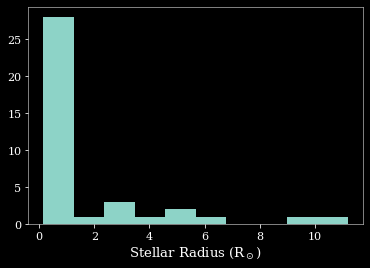

In [32]:
pl.hist(pars[fitinfo.model_id[selection]]['star.radius'])
pl.xlabel("Stellar Radius (R$_\odot$)")

Text(0.5, 0, 'Stellar Temperature (K)')

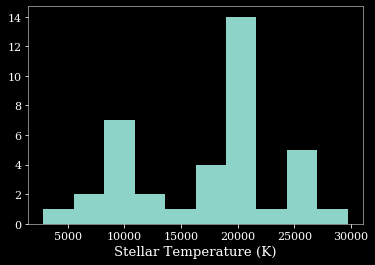

In [33]:
pl.hist(pars[fitinfo.model_id[selection]]['star.temperature'])
pl.xlabel("Stellar Temperature (K)")

Text(0.5, 0, 'Stellar Luminosity (L$_\\odot$)')

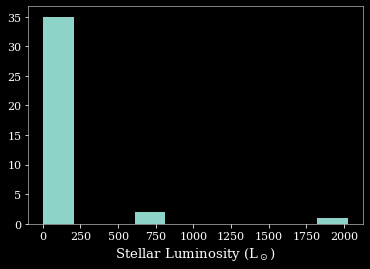

In [34]:
pl.hist(pars[fitinfo.model_id[selection]]['Model Luminosity'])
pl.xlabel("Stellar Luminosity (L$_\odot$)")

Text(0.5, 0, 'Envelope Mass (M$_\\odot$)')

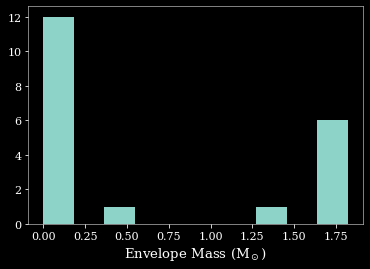

In [35]:
pl.hist(pars[fitinfo.model_id[selection]]['Envelope Mass'][5])
pl.xlabel("Envelope Mass (M$_\odot$)")

# Next Step: ALMA photometry


Aperture photometry in ALMA data to get 1mm, 3mm constraints

In [36]:
from astropy.visualization import simple_norm

In [37]:
pfxs['finaliter_prefix_b6']

'G351.77/B6/cleanest/G351.77_B6_uid___A001_X1296_X201_continuum_merged_12M_robust0_selfcal4_finaliter'

<Quantity 0.00048579 Jy / beam>

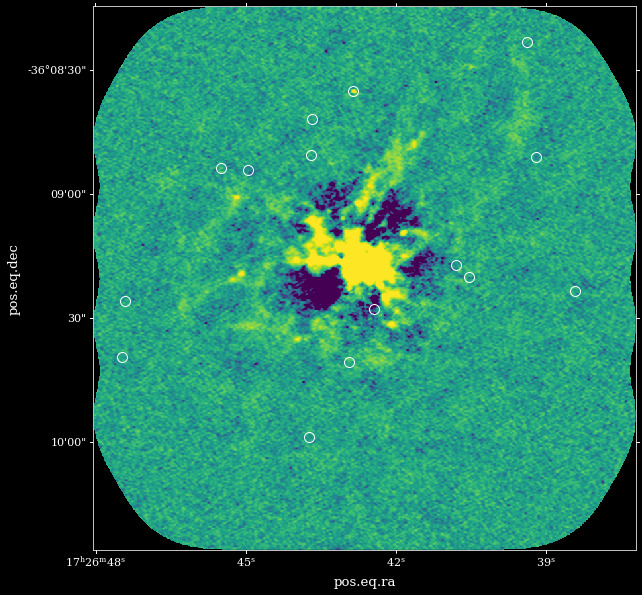

In [38]:
fieldid = 'G351'
basepath = '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults'
pfxs = prefixes[fieldid]

cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b6']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(projection=ww)
ax.imshow(cube[0].value, norm=simple_norm(cube[0].value, max_percent=99., min_percent=1, stretch='asinh'))

matches = ww.footprint_contains(coords)

cc = coords[matches]

ax.plot(cc.fk5.ra.deg, cc.fk5.dec.deg, 'wo', mfc='none', mec='w', markersize=10, transform=ax.get_transform('fk5'), )

alma_1mm_rms = cube.mad_std()
alma_1mm_rms

# Compute ALMA photometry

In [39]:
import photutils

In [40]:
crds = SkyCoord(sed_tbl['ra'], sed_tbl['dec'])
sky_apertures = photutils.aperture.SkyCircularAperture(crds, 2*u.arcsec)
apertures = sky_apertures.to_pixel(ww)

sky_annulus_aperture = photutils.aperture.SkyCircularAnnulus(crds, r_in=3*u.arcsec, r_out=5*u.arcsec)
annulus_apertures = sky_annulus_aperture.to_pixel(ww)

In [41]:
from astropy.stats import sigma_clipped_stats

In [42]:
annulus_masks = annulus_apertures.to_mask(method='center')
data = cube[0]

bkg_median = []
for mask in annulus_masks:
    annulus_data = mask.multiply(data)
    if annulus_data is None:
        bkg_median.append(np.nan * data.unit)
        continue
    annulus_data_1d = annulus_data[mask.data != 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_median.append(median_sigclip)
bkg_median = u.Quantity(bkg_median)
phot = photutils.aperture_photometry(data, apertures)
phot['annulus_median'] = bkg_median
phot['aper_bkg'] = bkg_median * apertures.area
phot['aper_sum_bkgsub'] = phot['aperture_sum'] - phot['aper_bkg']
phot['flux'] = phot['aper_sum_bkgsub'] / cube.pixels_per_beam * u.beam
phot['significant'] = phot['flux'] > 3 * alma_1mm_rms*u.beam

In [43]:
sed_tbl['ALMA-IMF_1mm_flux'] = np.where(phot['significant'], phot['flux'], np.nan)
sed_tbl['ALMA-IMF_1mm_eflux'] = alma_1mm_rms

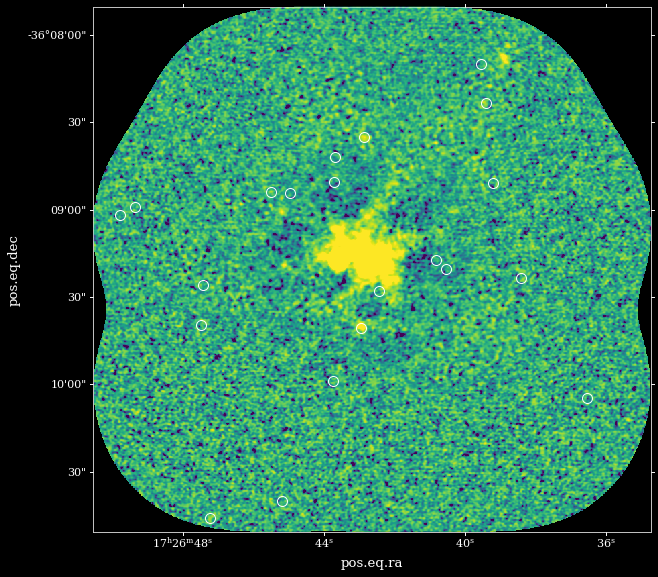

In [44]:
fieldid = 'G351'
basepath = '/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults'
pfxs = prefixes[fieldid]

cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b3']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(projection=ww)
ax.imshow(cube[0].value, norm=simple_norm(cube[0].value, max_percent=99., min_percent=1, stretch='asinh'))

matches = ww.footprint_contains(coords)

cc = coords[matches]

ax.plot(cc.fk5.ra.deg, cc.fk5.dec.deg, 'wo', mfc='none', mec='w', markersize=10, transform=ax.get_transform('fk5'), )

In [45]:
cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b3']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
alma_3mm_rms = cube.mad_std()

ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]

crds = SkyCoord(sed_tbl['ra'], sed_tbl['dec'])
sky_apertures = photutils.aperture.SkyCircularAperture(crds, 2*u.arcsec)
apertures = sky_apertures.to_pixel(ww)

sky_annulus_aperture = photutils.aperture.SkyCircularAnnulus(crds, r_in=3*u.arcsec, r_out=5*u.arcsec)
annulus_apertures = sky_annulus_aperture.to_pixel(ww)

annulus_masks = annulus_apertures.to_mask(method='center')
data = cube[0]

bkg_median = []
for mask in annulus_masks:
    annulus_data = mask.multiply(data)
    if annulus_data is None:
        bkg_median.append(np.nan * data.unit)
        continue
    annulus_data_1d = annulus_data[mask.data != 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_median.append(median_sigclip)
bkg_median = u.Quantity(bkg_median)
phot = photutils.aperture_photometry(data, apertures)
phot['annulus_median'] = bkg_median
phot['aper_bkg'] = bkg_median * apertures.area
phot['aper_sum_bkgsub'] = phot['aperture_sum'] - phot['aper_bkg']
phot['flux'] = phot['aper_sum_bkgsub'] / cube.pixels_per_beam * u.beam
phot['significant'] = phot['flux'] > 3 * alma_3mm_rms*u.beam

sed_tbl['ALMA-IMF_3mm_flux'] = np.where(phot['significant'], phot['flux'], np.nan)
sed_tbl['ALMA-IMF_3mm_eflux'] = alma_3mm_rms

In [46]:
# convert magnitudes to fluxes now
# (it's a pain to try to deal with a mix of magnitudes & fluxes)
for colname, errcolname, zpn in zip(magcols, emagcols, filternames):
    print(colname, zpn)
    zp = u.Quantity(zpts[zpn], u.Jy)
    data = sed_tbl[colname].value
    sed_tbl[zpn+"_flux"] = flx = (zp * 10**(data/-2.5)).to(u.mJy)
    err = sed_tbl[errcolname] / 1.09 * flx
    sed_tbl[zpn+"_eflux"] = err

Ymag Paranal/VISTA.Y
Zmag Paranal/VISTA.Z
Jmag Paranal/VISTA.J
Hmag Paranal/VISTA.H
Ksmag Paranal/VISTA.Ks
mag3_6 Spitzer/IRAC.I1
mag4_5 Spitzer/IRAC.I2
mag5_8 Spitzer/IRAC.I3
mag8_0 Spitzer/IRAC.I4


In [47]:
sed_tbl

<Table length=15>
SPICY     ra        dec     ... Spitzer/IRAC.I4_flux Spitzer/IRAC.I4_eflux
         deg        deg     ...         mJy                   mag         
int64  float64    float64   ...       float32               float32       
----- ---------- ---------- ... -------------------- ---------------------
54167 261.652251 -36.167927 ...             619973.7                    --
54233 261.688301  -36.17784 ...            5.0906515            0.20082387
54251 261.696805  -36.17938 ...            2.3333151            0.17767444
54224 261.682255 -36.166349 ...             619973.7                    --
54197 261.668901  -36.15563 ...            12.822514             0.5764249
54188 261.663333 -36.147512 ...            2.8626835            0.29677358
54255 261.697831 -36.160975 ...             619973.7                    --
54189 261.664128 -36.139826 ...             2.666693            0.14679043
54212 261.678557 -36.143122 ...            131.21194             2.6483142
54265 261.705651 -36.149799 ...             7.290764            0.37457135
54213  261.67888 -36.161311 ...             619973.7                    --
54207 261.676801 -36.157759 ...             619973.7                    --
54222 261.682114 -36.147398 ...            3.4007359            0.18719646
54235 261.689581 -36.148292 ...             7.151103            0.36083546
54221 261.681976 -36.144995 ...            2.1319308            0.40291536

We can also try to use the fluxes measured with getsf.

Those catalogs are in:

/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/February2021Release/catalog

Though as we'll see below, there is not a one-to-one match!

In [48]:
from astropy.io import ascii
getsf_cat = ascii.read(f'/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/February2021Release/catalog/{fieldid}-getsf.cat',
                       data_start=0, format='commented_header', header_start=120, comment="!")
getsf_cat

<Table length=34>
  NO    S1    S2    SX   XCO_P  ... BSIZE03 THETA03  FOFA03  FOOA03  FOOB03
int64 int64 int64 int64 float64 ... float64 float64 float64 float64 float64
----- ----- ----- ----- ------- ... ------- ------- ------- ------- -------
    1     2    80    23   436.2 ...   1.414   80.89  -2.311   3.325   3.249
    2     2    80    23   423.0 ...    1.64   85.99    -3.0   4.457   4.218
    3     2    80    30   426.1 ...    1.73   99.66  -2.655   3.796   3.733
    4    18    80    23   370.5 ...   1.789   40.78   -2.93   4.201    4.12
    5     8    80    28   361.7 ...   1.531   173.6  -2.655   3.836   3.733
    6     2    80    21   408.5 ...   1.028   164.9  -2.311   3.256   3.249
    7     2    80    23   416.2 ...   1.984   30.01    -3.0   4.241   4.218
    8     5    80    16   406.3 ...    0.23   71.44    -3.0   4.238   4.218
    9     5    80    16   283.5 ...   1.586   61.56    -3.0   4.245   4.218
   10     7    80    23   434.5 ...   1.252   10.44    -3.0   4.259   4.218
  ...   ...   ...   ...     ... ...     ...     ...     ...     ...     ...
   25    14    37    37   279.3 ...   2.049   152.5    -3.0   5.196   5.157
   26    15    31    31   401.0 ...    0.23   48.57    -3.0   4.272   4.218
   27     2    80    16   433.0 ...    1.66   18.41    -3.0   4.249   4.218
   28    15    80    30   345.5 ...   2.605   125.2    -3.0   4.242   4.218
   29    14    29    29   407.0 ...   1.463   163.9    -3.0   4.227   4.218
   30    15    28    28   395.0 ...   1.983   163.3    -3.0   4.237   4.218
   31    51    80    52   581.7 ...   5.103   25.02    -3.0    8.99   8.972
   32    15    35    35   380.0 ...  0.6434   16.87    -3.0   4.826   4.795
   33     8    80    23   400.2 ...   1.745   126.0    -3.0   4.237   4.218
   34    21    29    29   407.0 ...    0.23   166.7    -3.0   4.218   4.218

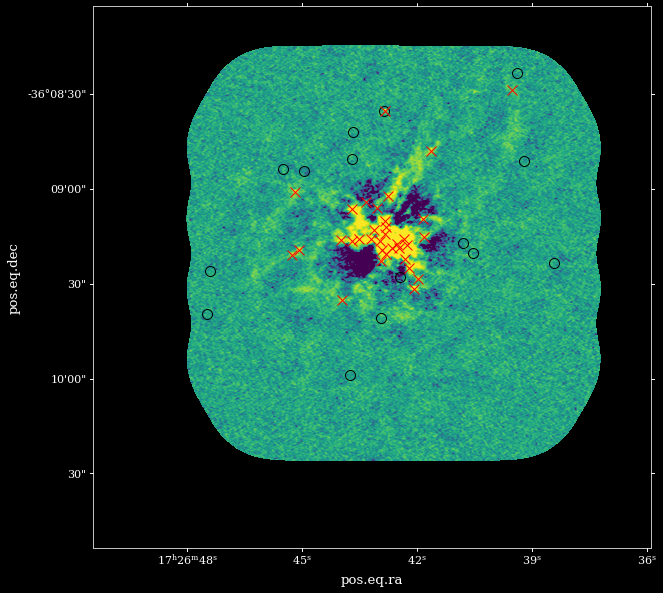

In [49]:
pfxs = prefixes[fieldid]

cube = SpectralCube.read(basepath + '/' + pfxs['finaliter_prefix_b6']+".image.tt0.fits",
                         format='fits', use_dask=False).minimal_subcube()
ww = cube.wcs.celestial
ww._naxis = cube.shape[1:]

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(projection=ww)
ax.imshow(cube[0].value, norm=simple_norm(cube[0].value, max_percent=99., min_percent=1, stretch='asinh'))

ax.plot(cc.fk5.ra.deg, cc.fk5.dec.deg, 'ko', mfc='none', mec='k', markersize=10, transform=ax.get_transform('fk5'), )

ax.plot(getsf_cat['WCS_ACOOR'], getsf_cat['WCS_DCOOR'],
        'rx', mfc='none', mec='r', markersize=10, transform=ax.get_transform('fk5'), )

In [50]:
# hacky function to extract the rows of an SED table as a plottable entry
def getrow(tb, rownum, keys):
    return np.array([tb[rownum][key] for key in keys])

In [51]:
sed_tbl[8]

<Row index=8>
SPICY     ra        dec         l          b        p1      p2      p3     class   silicate  pah        alpha             alpha_8       alpha_24 alpha_w4   env     group     var    nr     r     sigmar skewnessr          Spitzer            mag3_6 e_mag3_6  mag4_5 e_mag4_5  mag5_8 e_mag5_8  mag8_0 e_mag8_0  csf   m3_6  m4_5  m5_8  m8_0       2MASS               UKIDSS         VIRAC   GaiaDR2        MIPS              AllWISE        ZTFDR3  RA_ICRS    DE_ICRS    Ksmag   KsEll      pm          e_pm         pmRA        e_pmRA        pmDE        e_pmDE      Nep  flgrel   Zmag    Zell    Ymag    Yell    Jmag    Jell    Hmag    Hell  Zdetflg Ydetflg Jdetflg Hdetflg  ALMA-IMF_1mm_flux     ALMA-IMF_1mm_eflux   ALMA-IMF_3mm_flux     ALMA-IMF_3mm_eflux   Paranal/VISTA.Y_flux Paranal/VISTA.Y_eflux Paranal/VISTA.Z_flux Paranal/VISTA.Z_eflux Paranal/VISTA.J_flux Paranal/VISTA.J_eflux Paranal/VISTA.H_flux Paranal/VISTA.H_eflux Paranal/VISTA.Ks_flux Paranal/VISTA.Ks_eflux Spitzer/IRAC.I1_flux Spitzer/IRAC.I1_eflux Spitzer/IRAC.I2_flux Spitzer/IRAC.I2_eflux Spitzer/IRAC.I3_flux Spitzer/IRAC.I3_eflux Spitzer/IRAC.I4_flux Spitzer/IRAC.I4_eflux
         deg        deg        deg        deg                                                                                                                                                                                                   mag     mag      mag     mag      mag     mag      mag     mag                                                                                                                                             deg        deg       mag            mas / yr     mas / yr     mas / yr     mas / yr     mas / yr     mas / yr                   mag             mag             mag             mag                                                                      Jy / beam                                  Jy / beam                mJy                                        mJy                                        mJy                                        mJy                                         mJy                                         mJy                 mag mJy                mJy                 mag mJy                mJy                   mag                  mJy                   mag         
int64  float64    float64    float64    float64  float32 float32 float32   bytes9    bool    bool      float64            float64       float64  float64   bytes7  bytes10   int16 int16 float64 float64  float64           bytes26           float32 float32  float32 float32  float32 float32  float32 float32  int32 int32 int32 int32 int32      bytes18             bytes19         int32    int64       bytes18             bytes20        int64   float64    float64   float32 float32  float64      float64      float64      float64      float64      float64     int16 uint8  float64 float32 float64 float32 float32 float32 float64 float32  uint8   uint8   uint8   uint8        float64               float64              float64               float64               float64               float64              float64               float64              float32               float32              float64               float64               float32               float32               float32               float32              float32               float32              float32               float32              float32               float32       
----- ---------- ---------- ---------- --------- ------- ------- ------- --------- -------- ----- ------------------ ------------------ -------- -------- ------- ---------- ----- ----- ------- ------- --------- -------------------------- ------- -------- ------- -------- ------- -------- ------- -------- ----- ----- ----- ----- ----- ------------------ ------------------- --------- ------- ------------------ -------------------- ------ ---------- ---------- ------- ------- ---------- ------------- ----------- ------------- ----------- -------------- ----- -

In [52]:
from astropy import units as u
from sedfitter.extinction import Extinction
from sedfitter.source import Source

# Define path to models
model_dir = f'{robitaille_modeldir}/spubhmi'


# make an extinction law
from dust_extinction.parameter_averages import F19

# https://arxiv.org/abs/0903.2057
# 1.34 is from memory
guyver2009_avtocol = (2.21e21 * u.cm**-2 * (1.34*u.Da)).to(u.g/u.cm**2)
ext_wav = np.sort((np.geomspace(0.301, 8.699, 1000)/u.um).to(u.um, u.spectral()))
ext_vals = ext.evaluate(ext_wav, Rv=3.1)
extinction = Extinction()
extinction.wav = ext_wav
extinction.chi = ext_vals / guyver2009_avtocol

# Define filters and apertures
#filters = ['2J', '2H', '2K', 'I1', 'I2', 'I3', 'I4']
#apertures = [3., 3., 3., 3., 3., 3., 3.] * u.arcsec
filters = filternames+["ALMA-IMF_1mm", "ALMA-IMF_3mm"]
apertures = ([3]*(len(filters)))*u.arcsec


source = Source()
# wavelengths, getrow(sed, rownum), yerr=getrow(esed, rownum, emagcols),
rownum = 8


flx = getrow(sed_tbl, rownum, keys=[key+"_flux" for key in filters])
error = getrow(sed_tbl, rownum, keys=[key+"_eflux" for key in filters])
valid = np.isfinite(flx) & np.isfinite(error)

source.valid = valid#[valid]
source.flux = flx    
source.error =  error

fitter = Fitter(filter_names=np.array(filters),#[valid],
                apertures=apertures,#[valid],
                model_dir=model_dir,
                extinction_law=extinction,
                distance_range=[1.8,2.2]*u.kpc,
                av_range=[0,40],
               )


# Run the fitting
fitinfo = fitter.fit(source)

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  spubhmi
   Log[d] stepping     :  0.02
   Number of distances :  6

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------



   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//spubhmi/convolved/Paranal/VISTA.Y.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//spubhmi/convolved/Paranal/VISTA.Z.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//spubhmi/convolved/Paranal/VISTA.J.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//spubhmi/convolved/Paranal/VISTA.H.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//spubhmi/convolved/Paranal/VISTA.Ks.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//spubhmi/convolved/Spitzer/IRAC.I1.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//spubhmi/convolved/Spitzer/IRAC.I2.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//spubhmi/convolved/Spitzer/IRAC.I3.fits
   Reading /blue/adamginsburg/richardson.t/research/flux/robitaille_models//spu

In [53]:
(fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 600).sum(), source.flux, source,error, source.valid

(15,
 array([2.08454028e+07, 2.26441504e+07, 1.55068540e+07, 1.03588551e+00,
        1.24449015e+01, 5.68627548e+01, 8.78500748e+01, 1.16178711e+02,
        1.31211945e+02, 1.19082715e-02, 2.78963833e-03]),
 array([           nan,            nan,            nan, 1.35995608e-01,
        1.14173412e+00, 2.03453875e+00, 3.62683797e+00, 2.55806327e+00,
        2.64831424e+00, 4.85793289e-04, 2.51941903e-04]),
 array([False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True]))

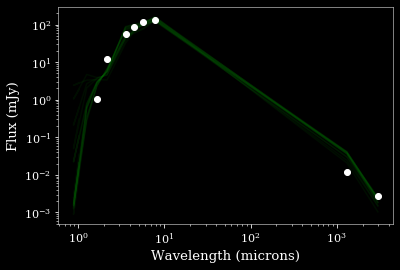

In [54]:
wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
pl.errorbar(wavelengths.value[valid], source.flux[valid], yerr=source.error[valid], linestyle='none', color='w', marker='o')
_=pl.plot(wavelengths.value,
          (10**fitinfo.model_fluxes[fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 600, :].T),
          alpha=0.1, color='g')
_=pl.loglog()
_=pl.xlabel("Wavelength (microns)")
_=pl.ylabel("Flux (mJy)")

In [55]:
from sedfitter.sed import SEDCube

In [56]:
sedcube = SEDCube.read(f"{model_dir}/flux.fits",)

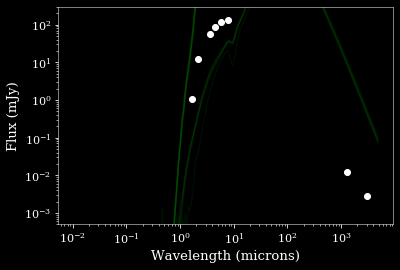

In [57]:
wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
pl.errorbar(wavelengths.value[valid], source.flux[valid], yerr=source.error[valid], linestyle='none', color='w', marker='o')

apnum = np.argmin(np.abs((3*u.arcsec * 2*u.kpc).to(u.au, u.dimensionless_angles()) - sedcube.apertures))
distance = 2*u.kpc

_=pl.plot(sedcube.wav,
          sedcube.val[fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 600, apnum, :].T * (1*u.kpc/distance)**2,
          alpha=0.1, color='g')

_=pl.loglog()
_=pl.xlabel("Wavelength (microns)")
_=pl.ylabel("Flux (mJy)")
_=pl.ylim(5e-4,3e2)

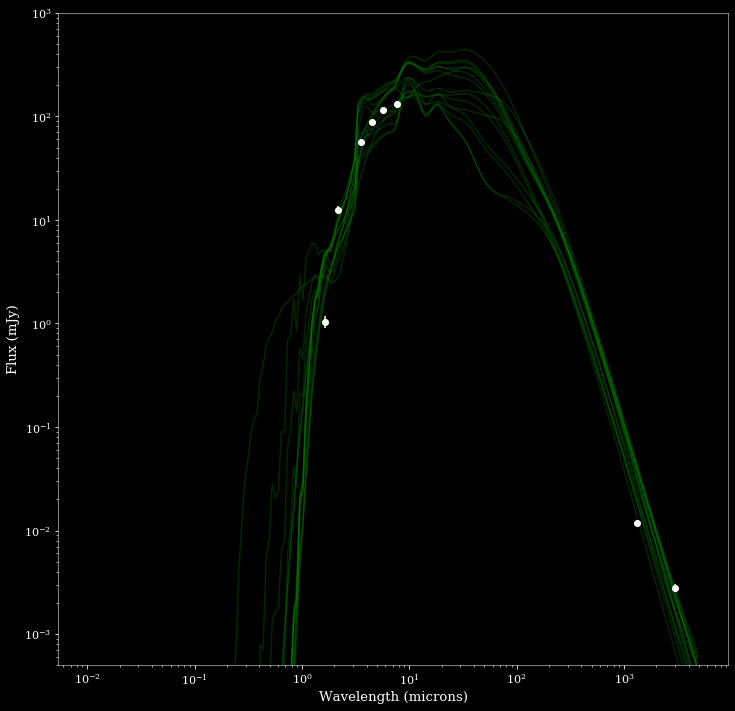

In [58]:
pl.figure(figsize=(12,12))


wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
pl.errorbar(wavelengths.value[valid], source.flux[valid], yerr=source.error[valid], linestyle='none', color='w', marker='o')

apnum = np.argmin(np.abs((3*u.arcsec * 2*u.kpc).to(u.au, u.dimensionless_angles()) - sedcube.apertures))
distance = 2*u.kpc

#_=pl.plot(sedcube.wav,
#          sedcube.val[fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 600, apnum, :].T * (1*u.kpc/distance)**2,
#          alpha=0.1, color='g')


for index in np.where(fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 600)[0]:
    modelname = fitinfo.model_name[index]
    sed = sedcube.get_sed(modelname)
    pl.plot(sed.wav,
            sed.flux[apnum] * fitinfo.sc[index] * 10**(fitinfo.av[index] * extinction.get_av(sed.wav)), 'g', alpha=0.3)


_=pl.loglog()
_=pl.xlabel("Wavelength (microns)")
_=pl.ylabel("Flux (mJy)")
_=pl.ylim(5e-4,1e3)

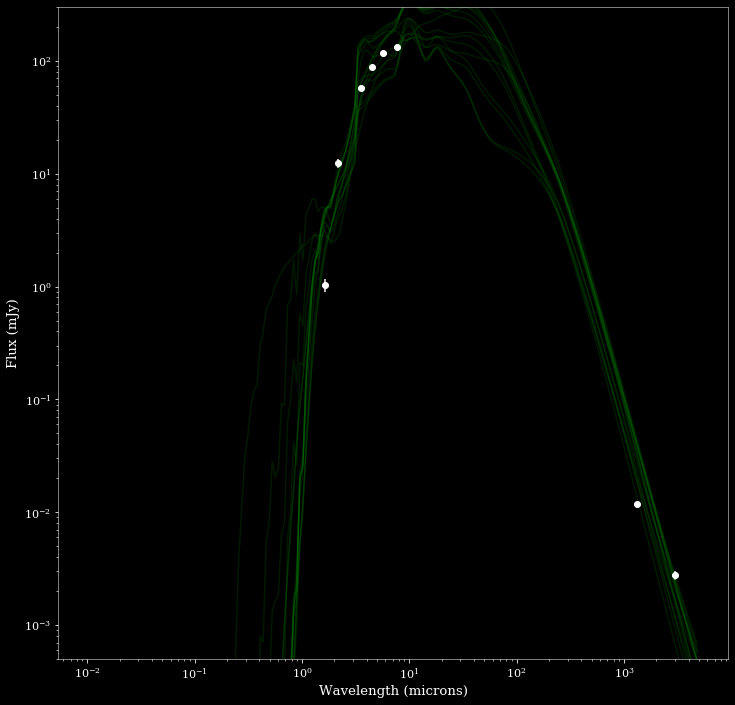

In [59]:
pl.figure(figsize=(12,12))


wavelengths = u.Quantity([wavelength_dict[fn] for fn in filters], u.um)
pl.errorbar(wavelengths.value[valid], source.flux[valid], yerr=source.error[valid], linestyle='none', color='w', marker='o')

apnum = np.argmin(np.abs((3*u.arcsec * 2*u.kpc).to(u.au, u.dimensionless_angles()) - sedcube.apertures))
distance = 2*u.kpc

#_=pl.plot(sedcube.wav,
#          sedcube.val[fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 600, apnum, :].T * (1*u.kpc/distance)**2,
#          alpha=0.1, color='g')


for index in np.where(fitinfo.chi2 < np.nanmin(fitinfo.chi2) + 600)[0]:
    modelname = fitinfo.model_name[index]
    sed = sedcube.get_sed(modelname)
    pl.plot(sed.wav,
            sed.flux[apnum] * fitinfo.sc[index] * 10**(fitinfo.av[index] * extinction.get_av(sed.wav)), 'g', alpha=0.2)


_=pl.loglog()
_=pl.xlabel("Wavelength (microns)")
_=pl.ylabel("Flux (mJy)")
_=pl.ylim(5e-4,3e2)